In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.metrics import Precision, Recall, AUC
from keras.callbacks import EarlyStopping

In [2]:
path = '../malimg_dataset/'

In [3]:
familias = ImageDataGenerator().flow_from_directory(directory=path, target_size=(64,64), batch_size=10000)

Found 9339 images belonging to 1 classes.


In [4]:
familias.class_indices

{'malimg_paper_dataset_imgs': 0}

In [5]:
imgs, labels = next(familias)

In [6]:
imgs.shape

(9339, 64, 64, 3)

In [7]:
labels.shape

(9339, 1)

In [8]:
def plots(ims, figsize=(20,30), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = 10
    for i in range(0,50):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(list(familias.class_indices.keys())[np.argmax(titles[i])], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [9]:
!pip show keras
!pip show tensorflow

Name: keras
Version: 3.3.3
Summary: Multi-backend Keras.
Home-page: https://github.com/keras-team/keras
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache License 2.0
Location: C:\Users\jupap\AppData\Roaming\Python\Python312\site-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, rich
Required-by: scikeras, tensorflow-intel
Name: tensorflow
Version: 2.16.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\jupap\AppData\Roaming\Python\Python312\site-packages
Requires: tensorflow-intel
Required-by: 


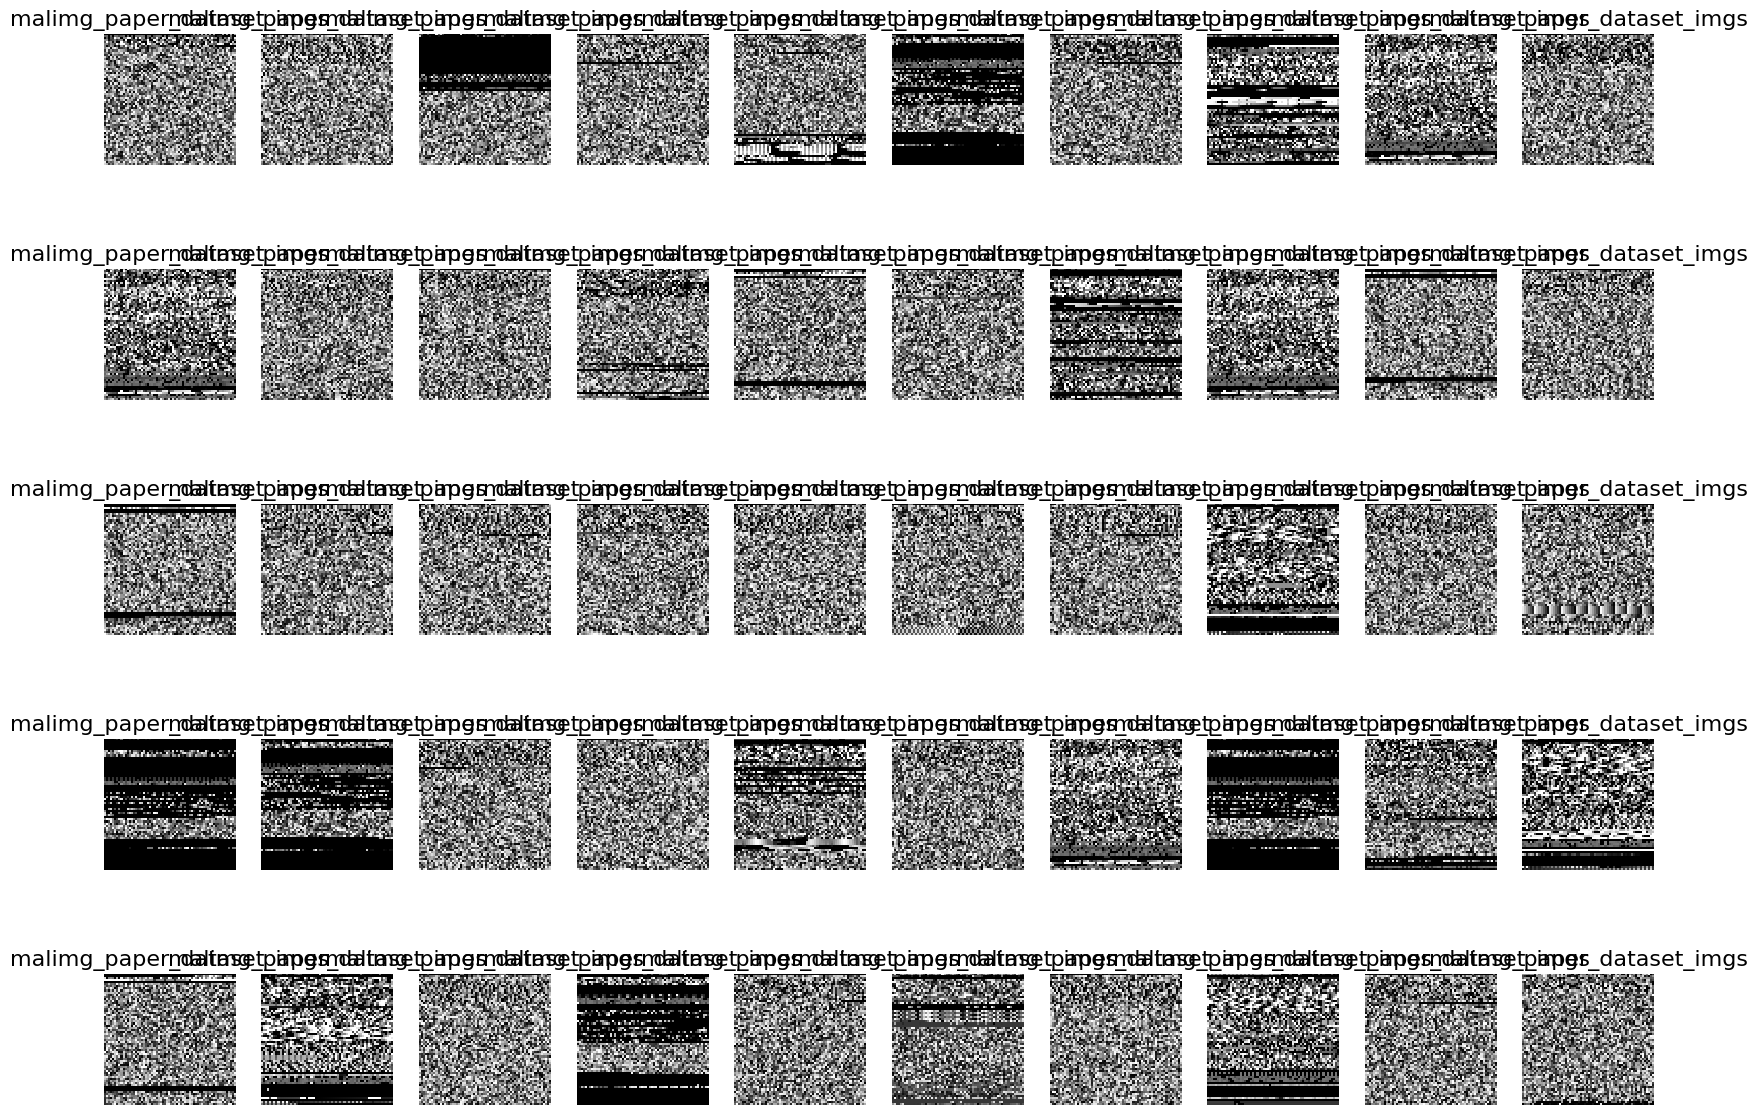

In [10]:

plots(imgs, titles = labels)

In [11]:
path = '../malimg_dataset/'

datagen = ImageDataGenerator(rescale=1./255)

generator = datagen.flow_from_directory(
    directory=path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

classIndices = generator.class_indices
classCounts = {className: 0 for className in classIndices.keys()}

for _, labels in generator:
    for label in labels:
        className = list(classIndices.keys())[np.argmax(label)]
        classCounts[className] += 1
    if generator.batch_index == 0:
        break

for className, count in classCounts.items():
    print(f"{className}: {count}")

Found 9339 images belonging to 1 classes.
malimg_paper_dataset_imgs: 9339


In [12]:
allImages = []
allLabels = []

for _ in range(generator.samples // generator.batch_size + 1):
    imgs, labels = next(generator)
    allImages.append(imgs)
    allLabels.append(labels)

allImages = np.concatenate(allImages, axis=0)
allLabels = np.concatenate(allLabels, axis=0)

allImages = allImages[:generator.samples]
allLabels = allLabels[:generator.samples]

In [13]:
# Dividiendo los datos en un conjunto de entrenamiento y otro de prueba
X_train, X_test, y_train, y_test = train_test_split(allImages, allLabels, test_size=0.3, random_state=42)

print(X_train, X_test)

[[[[0.8941177  0.8941177  0.8941177 ]
   [0.00392157 0.00392157 0.00392157]
   [0.27058825 0.27058825 0.27058825]
   ...
   [0.         0.         0.        ]
   [0.07450981 0.07450981 0.07450981]
   [0.00784314 0.00784314 0.00784314]]

  [[0.27450982 0.27450982 0.27450982]
   [0.14117648 0.14117648 0.14117648]
   [0.         0.         0.        ]
   ...
   [0.2901961  0.2901961  0.2901961 ]
   [0.05882353 0.05882353 0.05882353]
   [0.01568628 0.01568628 0.01568628]]

  [[0.5176471  0.5176471  0.5176471 ]
   [0.92549026 0.92549026 0.92549026]
   [0.35686275 0.35686275 0.35686275]
   ...
   [0.3137255  0.3137255  0.3137255 ]
   [0.76470596 0.76470596 0.76470596]
   [0.01568628 0.01568628 0.01568628]]

  ...

  [[0.7137255  0.7137255  0.7137255 ]
   [0.8000001  0.8000001  0.8000001 ]
   [0.         0.         0.        ]
   ...
   [0.41176474 0.41176474 0.41176474]
   [0.43921572 0.43921572 0.43921572]
   [0.47450984 0.47450984 0.47450984]]

  [[0.42352945 0.42352945 0.42352945]
   [0.1

In [14]:
print("Shape of X_train:", X_train.shape)

Shape of X_train: (6537, 64, 64, 3)


In [15]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

def create_model():
    model = Sequential([
        Conv2D(32, kernel_size=3, activation="relu", input_shape=(64, 64, 3)),  
        MaxPooling2D(pool_size=2),
        BatchNormalization(),  
        Conv2D(64, kernel_size=3, activation="relu"),
        MaxPooling2D(pool_size=2),
        BatchNormalization(), 
        Flatten(),
        Dense(128, activation="relu", 
              kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)),  
        Dropout(0.9),  
        Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )

    return model

In [16]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

model = create_model()

model.fit(X_train, y_train, epochs=5, batch_size=256)

model.save("model.h5")

Epoch 1/5
26/26 [==============================] - 15s 539ms/step - loss: 17.7953 - accuracy: 0.7733
Epoch 2/5
26/26 [==============================] - 13s 509ms/step - loss: 12.0814 - accuracy: 0.9628
Epoch 3/5
26/26 [==============================] - 14s 534ms/step - loss: 6.9790 - accuracy: 0.9823
Epoch 4/5
26/26 [==============================] - 14s 547ms/step - loss: 3.6622 - accuracy: 0.9832
Epoch 5/5
26/26 [==============================] - 14s 528ms/step - loss: 1.9850 - accuracy: 0.9867


c:\Users\jupap\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Segunda parte

In [17]:
%pip install adversarial-robustness-toolbox

  Using cached adversarial_robustness_toolbox-1.17.1-py3-none-any.whl.metadata (11 kB)
Using cached adversarial_robustness_toolbox-1.17.1-py3-none-any.whl (1.7 MB)
Note: you may need to restart the kernel to use updated packages.


Cargando el modelo

In [18]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from art.estimators.classification import KerasClassifier

tf.compat.v1.disable_eager_execution()

model = load_model('model.h5')

classifier = KerasClassifier(model=model)

c:\Users\jupap\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\jupap\AppData\Local\Programs\Python\Python311\Lib\site-packages\art\estimators\certification\__init__.py:29: UserWarning: PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality
  warnings.warn("PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality")


Instructions for updating:
Colocations handled automatically by placer.


**Ataque de evasión**

In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Conv2DTranspose
from tensorflow.keras.models import Sequential
import numpy as np
from art.attacks.evasion import FastGradientMethod
from sklearn.metrics import accuracy_score

def createDenoisingModel():
    model = Sequential([
        Conv2D(32, (3, 3), padding='same', input_shape=(64, 64, 3)),
        BatchNormalization(),
        Activation('relu'),
        Conv2D(32, (3, 3), padding='same'),
        BatchNormalization(),
        Activation('relu'),
        Conv2DTranspose(32, (3, 3), padding='same'),
        BatchNormalization(),
        Activation('relu'),
        Conv2D(3, (3, 3), padding='same', activation='sigmoid')  
    ])
    return model

noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

denoisingModel = createDenoisingModel()
denoisingModel.compile(optimizer='adam', loss='mean_squared_error')
denoisingModel.fit(X_train_noisy, X_train, epochs=5, batch_size=256, validation_data=(X_test_noisy, X_test))

attackFgsm = FastGradientMethod(estimator=classifier, eps=0.001)  
x_test_adv = attackFgsm.generate(x=X_test)

if len(y_test.shape) > 1:  
    y_test = np.argmax(y_test, axis=1)

predictionsNormal = classifier.predict(X_test)
if len(predictionsNormal.shape) > 1:
    predictionsNormal = np.argmax(predictionsNormal, axis=1)
accuracyNormal = accuracy_score(y_test, predictionsNormal)

predictions = classifier.predict(x_test_adv)
if len(predictions.shape) > 1:
    predictions = np.argmax(predictions, axis=1)
accuracyFgsm = accuracy_score(y_test, predictions)

x_test_adv_denoised = denoisingModel.predict(x_test_adv)

predictionsDenoised = classifier.predict(x_test_adv_denoised)
if len(predictionsDenoised.shape) > 1:
    predictionsDenoised = np.argmax(predictionsDenoised, axis=1)
accuracyDenoised = accuracy_score(y_test, predictionsDenoised)

Train on 6537 samples, validate on 2802 samples
Epoch 1/5
6537/6537 [==============================] - ETA: 0s - loss: 0.0753

c:\Users\jupap\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


6537/6537 [==============================] - 67s 10ms/sample - loss: 0.0753 - val_loss: 0.0962
Epoch 2/5
6537/6537 [==============================] - 65s 10ms/sample - loss: 0.0507 - val_loss: 0.0917
Epoch 3/5
6537/6537 [==============================] - 66s 10ms/sample - loss: 0.0476 - val_loss: 0.0889
Epoch 4/5
6537/6537 [==============================] - 64s 10ms/sample - loss: 0.0462 - val_loss: 0.0823
Epoch 5/5
6537/6537 [==============================] - 61s 9ms/sample - loss: 0.0455 - val_loss: 0.0752


c:\Users\jupap\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
c:\Users\jupap\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [20]:
print(f"Accuracy en datos normales: {accuracyNormal * 100:.2f}%")
print(f"Accuracy en datos de ataque FGSM: {accuracyFgsm * 100:.2f}%")
print(f"Accuracy en datos de ataque después de denoising: {accuracyDenoised * 100:.2f}%")


Accuracy en datos normales: 99.54%
Accuracy en datos de ataque FGSM: 99.43%
Accuracy en datos de ataque después de denoising: 100.00%


**Explicación del ataque de evasión:**

El código que se tiene en la celda pertenece a un ataque adversario usando el método de "Fast Gradient Sign Method (FGSM) por medio de la librería ART (Adversarial Robustness Toolbox) en Python. Primero, importo la librería FGSM y configuro el modelo "classifier" a atacar y la magnitud del ataque (en este caso un eps de 0.1). Luego, se generan imágenes adversarias y se asignan a la variable "x_test_adv" modificando así las imágenes de prueba de la variable "X_test" con el objetivo de engañar al modelo.

El modelo se evalúa primero en las imágenes originales de prueba para obtener una línea base de precisión (o sea el "accuracy_normal"), enseñando así como se desempeña el modelo en condiciones normales. Finalmente, se evalúa la precisión del modelo con las imágenes adversarias para ver como afecta el ataque FGSM a su rendimiento ayudando a entender la robustez del modelo ante ataques adversarios. Este proceso es altamente importante para la seguridad en modelos de aprendizaje automático, permitiendo así identificar y mejorar su resistencia frente a manipulaciones malintencionadas.

**Explicación del modelo denoising**

La defensa que se aplicó al modelo consiste en un modelo de denoising que está diseñado directamente para limpiar limpiar imágenes que fueron alteradas por un ataque adversario, que en este caso fue el Fast Gradient Sign Method (FGSM). Este modelo de denoising se entrena primero con un conjunto de datos donde las imágenes originales han sido artificialmente ruidosas, aprendiendo así a restaurar estas imágenes a su estado limpio y original. Luego, después de que el modelo clasificador ha sido desafiado con imágenes adversarias generadas por el ataque FGSM, estas imágenes alteradas se procesan a través del modelo denoising para intentar eliminar las perturbaciones adversarias antes de ser re-evaluadas por el modelo clasificador. El objetivo de la defensa aplicada en esta ocasión es mejorar de alguna manera la precisión del clasificador en presencia de ataques adversarios, demostrando la efectividad del modelo de denoising en la protección contra manipulaciones específicas diseñadas para engañar al clasificador.

**Explicación del ataque de evasión:**

El código que se tiene en la celda pertenece a un ataque adversario usando el método de "Fast Gradient Sign Method (FGSM) por medio de la librería ART (Adversarial Robustness Toolbox) en Python. Primero, importo la librería FGSM y configuro el modelo "classifier" a atacar y la magnitud del ataque (en este caso un eps de 0.1). Luego, se generan imágenes adversarias y se asignan a la variable "x_test_adv" modificando así las imágenes de prueba de la variable "X_test" con el objetivo de engañar al modelo.

El modelo se evalúa primero en las imágenes originales de prueba para obtener una línea base de precisión (o sea el "accuracy_normal"), enseñando así como se desempeña el modelo en condiciones normales. Finalmente, se evalúa la precisión del modelo con las imágenes adversarias para ver como afecta el ataque FGSM a su rendimiento ayudando a entender la robustez del modelo ante ataques adversarios. Este proceso es altamente importante para la seguridad en modelos de aprendizaje automático, permitiendo así identificar y mejorar su resistencia frente a manipulaciones malintencionadas.

**Ataque de extracción**

In [21]:
# Importación de librerías necesarias
import numpy as np
import tensorflow as tf
from art.estimators.classification import KerasClassifier
from art.attacks.extraction import CopycatCNN
from sklearn.metrics import accuracy_score

# Aplicando ruido gaussiano a las predicciones
def add_gaussian_noise(predictions, sigma=0.1):
    noise = np.random.normal(0, sigma, predictions.shape)
    return np.clip(predictions + noise, 0, 1)

# Cargando el modelo preentrenado (víctima)
model_victim = tf.keras.models.load_model('model.h5')

# Envolviendo el modelo en un clasificador ART
classifier_victim = KerasClassifier(model=model_victim, clip_values=(0, 1))

# Envolviendo y defendiendo el modelo con ruido gaussiano
def predict_with_noise(classifier, X):
    predictions = classifier.predict(X)
    return add_gaussian_noise(predictions)

thieved_model = create_model()

# Envolviendo el thieved model con un clasificador de ART
thieved_classifier = KerasClassifier(model=thieved_model, clip_values=(0, 1))

X_data = np.random.rand(100, 64, 64, 3)  # 100 imágenes aleatorias como ejemplo

# Configurando el ataque Copycat CNN
attack = CopycatCNN(classifier=classifier_victim, batch_size_fit=32, batch_size_query=32, nb_epochs=10, nb_stolen=100)

# Ejecutando el ataque para extraer un nuevo modelo
thieved_classifier = attack.extract(x=X_data, thieved_classifier=thieved_classifier)

# Realizando las predicciones
predictions = predict_with_noise(classifier_victim, X_test)

if len(y_test.shape) > 1:
    y_test = np.argmax(y_test, axis=1)

# Verificando y ajustando las predicciones si es necesario
if len(predictions.shape) > 1:
    predictions = np.argmax(predictions, axis=1)

# Calculando el accuracy del modelo víctima
predictions_original = classifier_victim.predict(X_test)
if len(predictions_original.shape) > 1:
    predictions_original = np.argmax(predictions_original, axis=1)

accuracy_original = np.mean(predictions_original == y_test)
print(f"Accuracy of the original model: {accuracy_original * 100:.2f}%")

# Calculando el accuracy del modelo atacante
accuracy_thieved = np.mean(predictions == y_test)
print(f"Accuracy of the thieved model: {accuracy_thieved * 100:.2f}%")

c:\Users\jupap\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Accuracy of the original model: 99.54%
Accuracy of the thieved model: 87.40%


**Explicación del ataque de extracción:**

El código que se tiene para el ataque de extracción utiliza la técnica de Copycat CNN para robar la funcionalidad de un modelo preentrenado usando así la librería ART en Python. En un principio se importan las librerías necesarisa y se carga el modelo preentrenado, designado así como el modelo víctima. El modelo cargado se envuelve en un clasificador ART, configurando así sus valores de entrada entre 0 y 1. Luego, se crea un nuevo modelo, denominado thieved modelo, que también se envuelve en un clasificador ART. SE preparan 100 imágenes aleatorias de tamaño 64x64 en 3 canales (que en este caso es el color completo) para utilizarlas en el ataque. El ataque Copycat CNN se configura con parámetros como tamaño de lote y número de épocas, y luego se ejecuta usando el clasificador de la víctima y las imágenes aleatorias para entrenar el modelo thieved a imitar el comportamiento del modelo original.

Posteriormente, se evalúan ambolos modelos (víctima y thieved) en un conjunto de prueba "X_test", ajustando las predicciones y los etiquetados para calcular la precsión de clasificación. Finalmente, se calcula y se compara la precisión del modelo original y del modelo thieved, enseñando así que tan efectivo fue el modelo thieved para imitar la funcionalidad del modelo víctima. Lo anterior es importante para el contexto de seguridad para entender y reducir los riesgos de ataques que buscan clonar la funcionalidad de modelos sensibles.

**Explicación de la defensa con ruido gaussiano:**

La defensa consiste en agregar ruido gaussiano a las predicciones del modelo víctima antes de que estas sean usadas para entrenar otro modelo (en este caso llamado "thieved model"). El ruido se geenra al sumar cada predicción un valor aleaotrio normalmente distribuido con media cero y desviación estándar definida por sigma y luego se asegura que los valores resultantes estén dentro del rango entre 0 y 1 usando así una función de numpy llamada "np.clip". Este proceso de inyección de ruido tiene como objetivo distorcionar las señales que el atacante puede usar para aprender y replicar el comportamiento del modelo víctima, reduciendo así la efectividad de extracción. Al final, se evalúa la precisión del modelo original y del modelo extraído para verificar cuánto ha afectado el ruido a la capacidad del atacante para replicar el modelo víctima correctamente.